In [1]:
#Including important libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data Preparation

# Section 1: Data Preparation
### Load and Visualise the data
- Download
- Load
- Visualise
- Normalisation

In [2]:
#Load
X = pd.read_csv("./Training Data/Linear_X_Train.csv")
y = pd.read_csv("./Training Data/Linear_Y_Train.csv")

In [3]:
y.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [4]:
#Convert X,Y to numpy arrays
X = X.values
y= y.values

In [5]:
#Normalisation
X = (X-X.mean())/X.std()   #Only X values are normalised always. NOT Y.

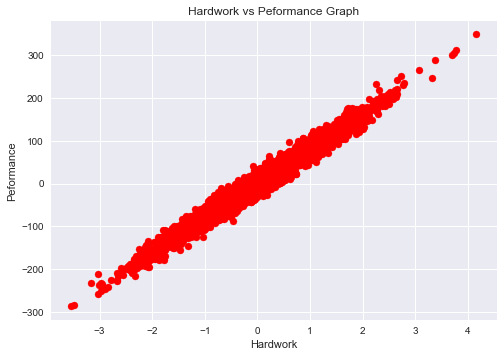

In [6]:
#Visualise
plt.style.use("seaborn")
plt.scatter(X,y,color='red')
plt.title("Hardwork vs Peformance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Peformance")
plt.show()

In [7]:
X.shape, y.shape

((3750, 1), (3750, 1))

## Section 2: Linear Regression

In [8]:
def hypothesis(x,theta):
    #theta = [theta0, theta1]
    y_= theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
        
    return (grad/m)  
    
def error(X,Y,theta):
    
    m = X.shape[0]
    total_error = 0.0
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return (total_error/m)

def gradientDescent(X,Y,max_steps=100,learning_rate=0.1):
    
    theta = np.zeros((2,))
    error_list = []
    
    for i in range(max_steps):
                
        #Compute gradient
        grad = gradient(X,Y,theta)
        
        #Record error
        e = error(X,Y,theta)[0]
        
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        error_list.append(e)
        
    return theta,error_list

In [9]:
theta,error_list = gradientDescent(X,y)

In [10]:
theta

array([ 0.6838508 , 79.90361453])

In [11]:
error_list

[6576.35005246196,
 5363.125102574931,
 4380.412893166487,
 3584.4160035456366,
 2939.658522952752,
 2417.404963672508,
 1994.3795806555281,
 1651.7290204117544,
 1374.1820666143055,
 1149.3690340383696,
 967.2704776518652,
 819.770646978796,
 700.2957841336078,
 603.5211452290067,
 525.1336877162773,
 461.6398471309694,
 410.20983625687,
 368.55152744884856,
 334.80829731435097,
 307.47628090540843,
 285.33734761416457,
 267.4048116482566,
 252.87945751587242,
 241.11392066864,
 231.5838358223823,
 223.86446709691373,
 217.61177842928484,
 212.54710060850397,
 208.4447115736724,
 205.1217764554589,
 202.43019900970543,
 200.25002127864602,
 198.48407731648712,
 197.05366270713802,
 195.8950268735658,
 194.95653184837263,
 194.19635087796493,
 193.58060429193594,
 193.08184955725244,
 192.67785822215873,
 192.35062524073192,
 192.08556652577707,
 191.87086896666273,
 191.69696394378104,
 191.55610087524585,
 191.4420017897342,
 191.34958153046787,
 191.2747211204641,
 191.2140841883591

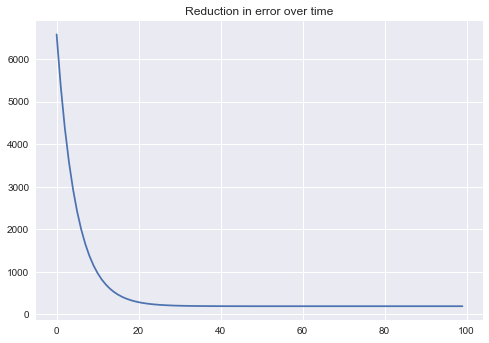

In [12]:
plt.plot(error_list)
plt.title('Reduction in error over time')
plt.show()

## Section 3. Predictions and Best Line

In [13]:
y_ = hypothesis(X,theta)

In [14]:
y_.shape

(3750, 1)

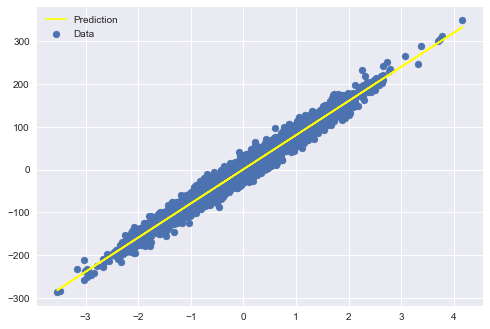

In [15]:
plt.scatter(X,y,label='Data')
plt.plot(X,y_, color='yellow',label="Prediction")
plt.legend()
plt.show()

In [16]:
# Loading the test data
x_test = pd.read_csv('Testing Data/Linear_X_Test.csv')

In [17]:
x_test.head()

,x
0,-1.877944
1,-0.869032
2,-2.530182
3,2.760205
4,0.591000


In [18]:
x_test.shape

(1250, 1)

In [19]:
y_test = hypothesis(x_test,theta)

In [20]:
y_test

,x
0,-149.370696
1,-68.754940
2,-201.486870
3,221.234243
4,47.906897
5,-102.839310
6,-15.043418
7,24.021887
8,-64.972398
9,-119.296727


In [21]:
#Saving to csv file

#df = pd.DataFrame(data=y_test, columns=["y"])
#Skip this step as y_test is already a pandas dataframe.

In [22]:
y_test.to_csv('y_predictions.csv',index = False)

# Section 4: Computing Score
Score: R2 (R-Squared) or Coefficient of Determination

In [25]:
def r2_score(Y,Y_):
    
    # Instead of loop, np.sum is recommended as it is faster
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    
    score = (1- num/denom)
    return score*100

In [26]:
r2_score(y,y_)

97.09612226971643